损失函数cost对权重w求偏导，得到梯度，想要下降对梯度取负（正方向上升，负方向下降）

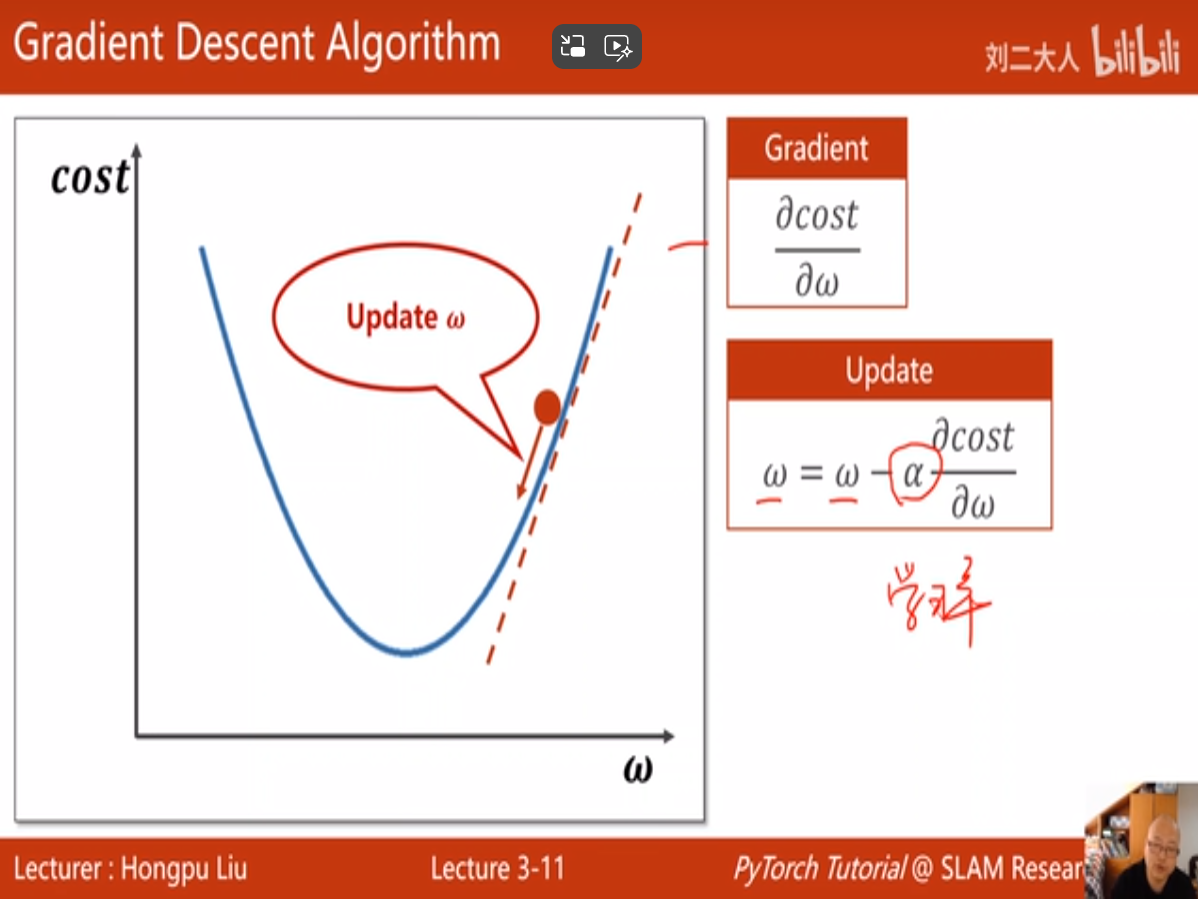

可能陷入局部最优，不一定找到全局最优

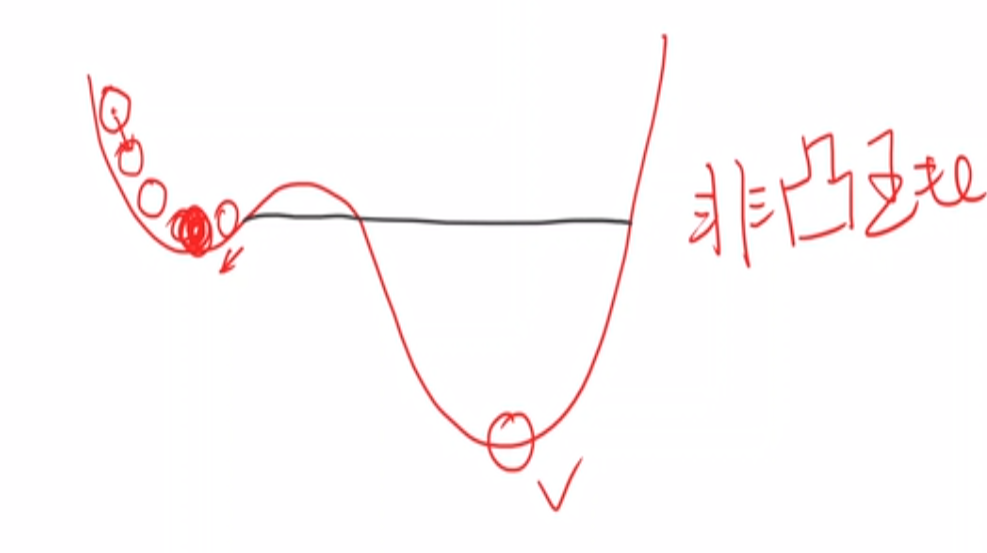

鞍点：梯度为0，无法在鞍点迭代（最大问题）

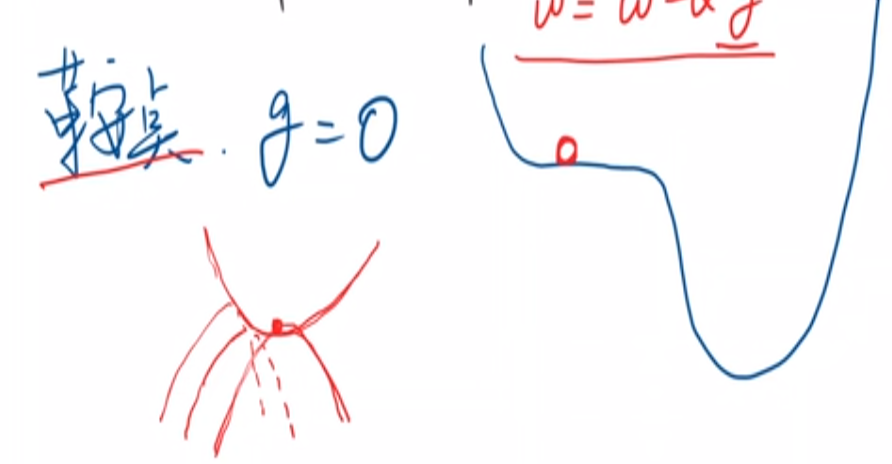

求导

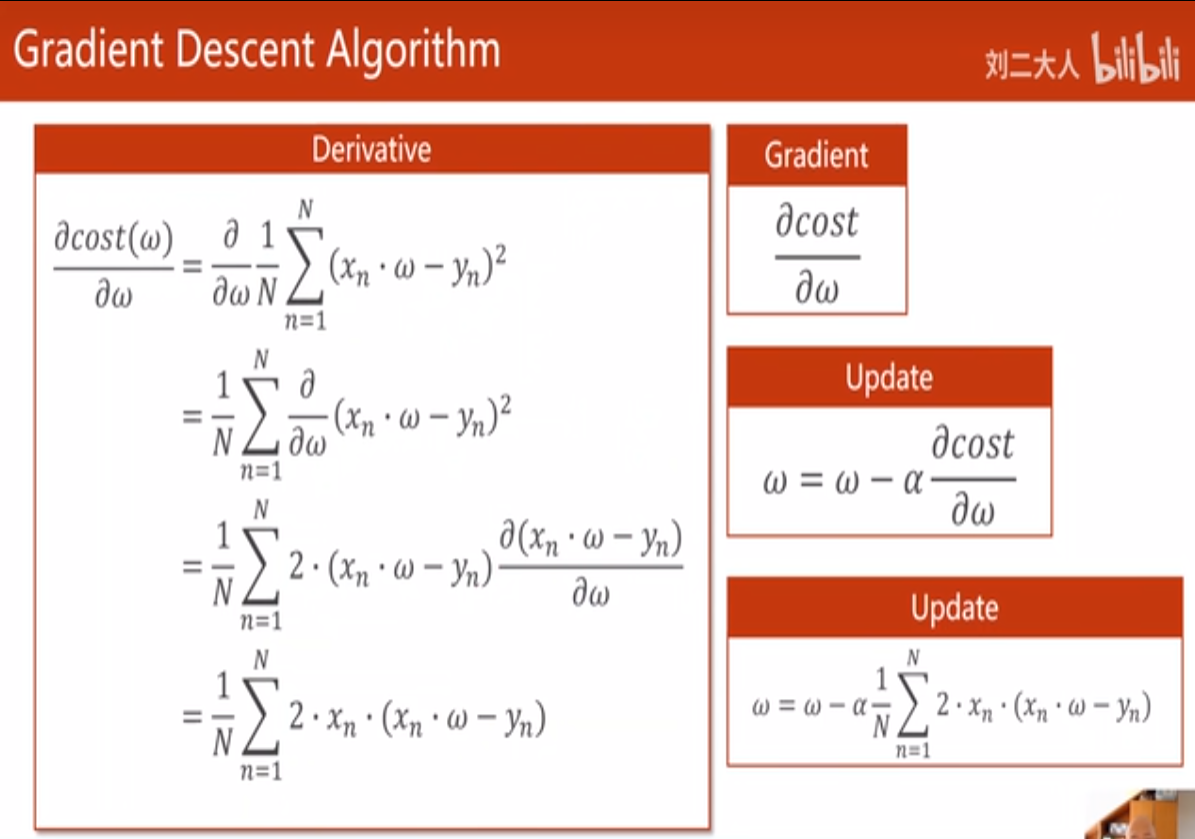

In [57]:
x_data=[1,2,3]
y_data=[2,4,6]

#初始权重
w=1
lr=0.01
cost_value_list=[]
epoch_list=[]



In [58]:
def forward(x):
    return x*w

In [59]:
def cost(xs,ys):
    cost=0
    for x,y in zip(xs,ys):
        cost+=(forward(x)-y)**2
    return cost/len(xs)#mse

In [60]:
def gradient(xs,ys):
    grad=0
    for x,y in zip(xs,ys):
        grad+=2*x*(forward(x)-y)
    grad/=len(xs)
    return grad


In [61]:
for i in range(800):
    cost_value=cost(x_data,y_data)
    grad=gradient(x_data,y_data)
    w-=lr*grad
    print("epoch:",i,"w:",w,"cost:",cost_value)
    cost_value_list.append(cost_value)
    epoch_list.append(i)


print("y_pred:",forward(4))


epoch: 0 w: 1.0933333333333333 cost: 4.666666666666667
epoch: 1 w: 1.1779555555555554 cost: 3.8362074074074086
epoch: 2 w: 1.2546797037037036 cost: 3.1535329869958857
epoch: 3 w: 1.3242429313580246 cost: 2.592344272332262
epoch: 4 w: 1.3873135910979424 cost: 2.1310222071581117
epoch: 5 w: 1.4444976559288012 cost: 1.7517949663820642
epoch: 6 w: 1.4963445413754464 cost: 1.440053319920117
epoch: 7 w: 1.5433523841804047 cost: 1.1837878313441108
epoch: 8 w: 1.5859728283235668 cost: 0.9731262101573632
epoch: 9 w: 1.6246153643467005 cost: 0.7999529948031382
epoch: 10 w: 1.659651263674342 cost: 0.6575969151946154
epoch: 11 w: 1.6914171457314033 cost: 0.5405738908195378
epoch: 12 w: 1.7202182121298057 cost: 0.44437576375991855
epoch: 13 w: 1.7463311789976905 cost: 0.365296627844598
epoch: 14 w: 1.7700069356245727 cost: 0.3002900634939416
epoch: 15 w: 1.7914729549662791 cost: 0.2468517784170642
epoch: 16 w: 1.8109354791694263 cost: 0.2029231330489788
epoch: 17 w: 1.8285815011136133 cost: 0.16681

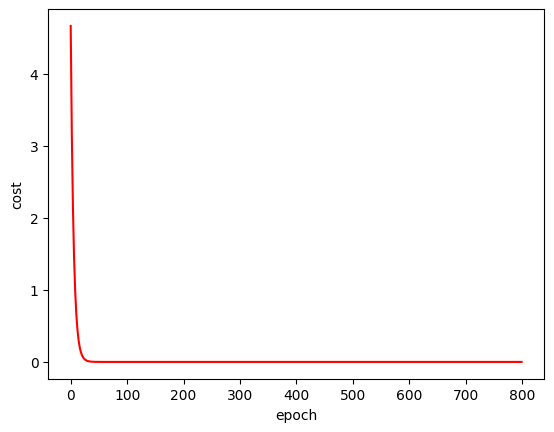

In [62]:
#画图
import matplotlib.pyplot as plt
plt.plot(epoch_list,cost_value_list,color="red")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()



训练发散：cost函数值增加

随机梯度下降，从n个数据里面随机选单个样本梯度下降

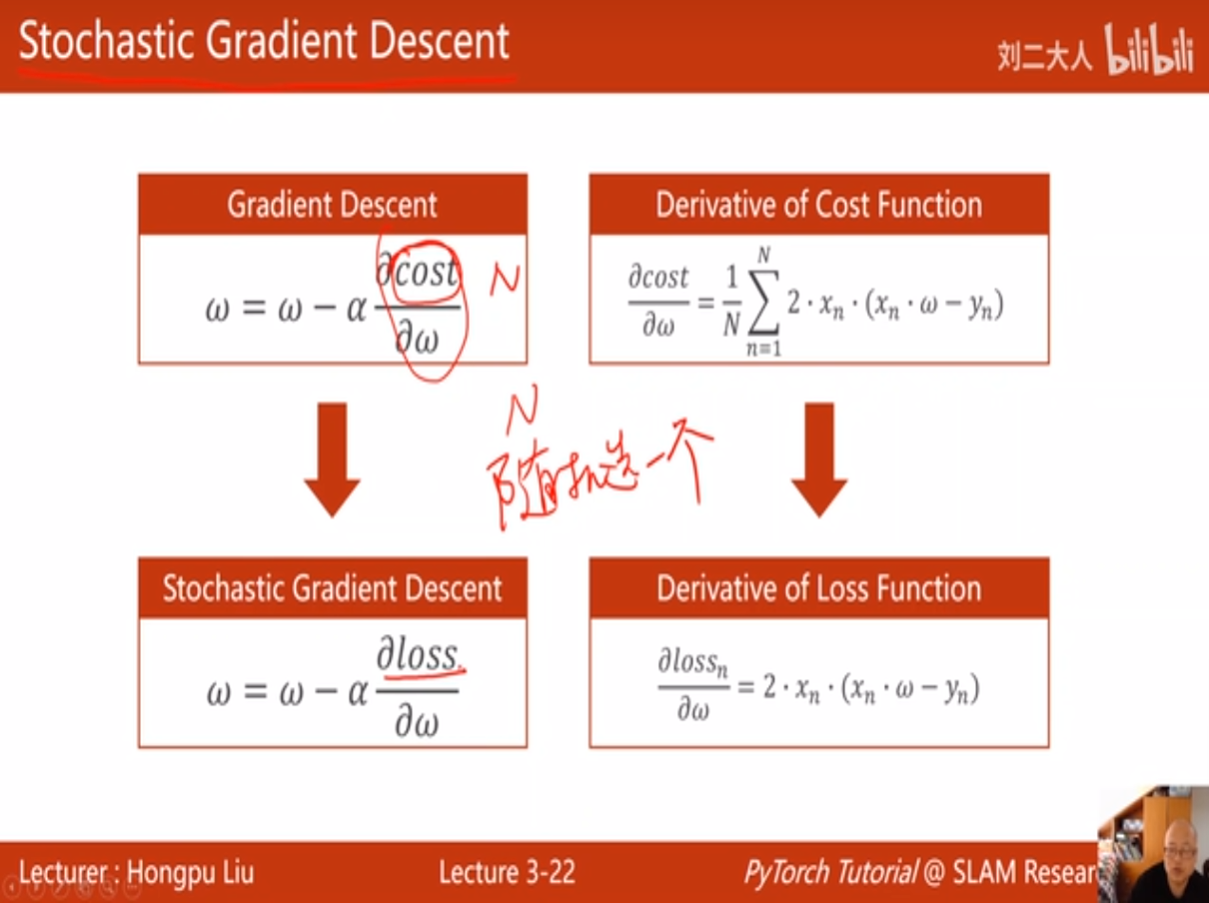

对每一个样本梯度进行更新，随机梯度下降中下一次函数值的运算依赖于上一次的梯度下降，不能并行.梯度下降可以并行

In [66]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

def gradient_s(x, y):
    return 2 * x * (x * w - y)

print('Predict (before training)', 4, forward(4))

for epoch in range(800):
    for x, y in zip(x_data, y_data):
        grad = gradient_s(x, y)

        w = w - 0.01 * grad
        print('\tgrad:', x, y, grad)
        l = loss(x, y)
    
    print('progress:', epoch, 'w=', w, 'loss=', l)

print('Predict (after training)', 4, forward(4))

Predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -1.2802140678

batch：若干个一组，批量随机梯度下降

In [69]:
import random

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

def gradient(x, y):
    return 2 * x * (x * w - y)

print('Predict (before training)', 4, forward(4))

batch_size = 2  # 批量大小

for epoch in range(100):
    # 随机打乱索引
    indices = list(range(len(x_data)))
    random.shuffle(indices)
    
    for i in range(0, len(x_data), batch_size):# 每次取batch_size个样本

        batch_indices = indices[i:i+batch_size]
        grad_sum = 0
        
       # 计算批次的梯度和损失
        batch_loss = 0
        for idx in batch_indices:
            x = x_data[idx]
            y = y_data[idx]
            grad = gradient(x, y)
            grad_sum += grad
            batch_loss += loss(x, y)

        
        # 计算平均梯度和平均损失
        grad_avg = grad_sum / len(batch_indices)
        batch_loss_avg = batch_loss / len(batch_indices)
        w = w - 0.01 * grad_avg
        print('\tgrad:', grad_avg, 'loss:', batch_loss_avg)
    
    print('progress:', epoch, 'w=', w, 'loss=', l)

print('Predict (after training)', 4, forward(4))

Predict (before training) 4 4.0
	grad: -10.0 loss: 5.0
	grad: -7.199999999999999 loss: 3.2399999999999993
progress: 0 w= 1.1720000000000002 loss= 8.466862131231726e-18
	grad: -4.139999999999999 loss: 1.7139599999999993
	grad: -14.1588 loss: 5.56865604
progress: 1 w= 1.354988 loss= 8.466862131231726e-18
	grad: -6.45012 loss: 2.0802024007200006
	grad: -4.644086399999999 loss: 1.3479711556665595
progress: 2 w= 1.4659300640000001 loss= 8.466862131231726e-18
	grad: -5.340699359999999 loss: 1.4261534826952198
	grad: -3.8453035391999997 loss: 0.9241474567865027
progress: 3 w= 1.557790092992 loss= 8.466862131231726e-18
	grad: -5.748728791104 loss: 1.271072412064156
	grad: -0.7694452381939199 loss: 0.14801149364482452
progress: 4 w= 1.6229718332849792 loss= 8.466862131231726e-18
	grad: -1.885140833575104 loss: 0.35537559624122383
	grad: -6.447181650826858 loss: 1.154615312187737
progress: 5 w= 1.7062950581289986 loss= 8.466862131231726e-18
	grad: -1.468524709355007 loss: 0.21565648219862077
	gr

代码解释

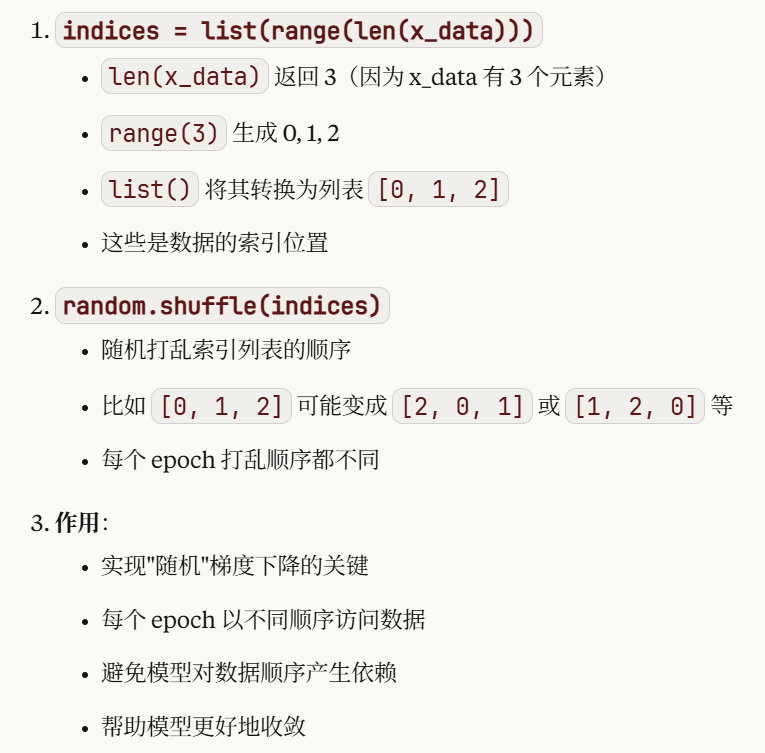

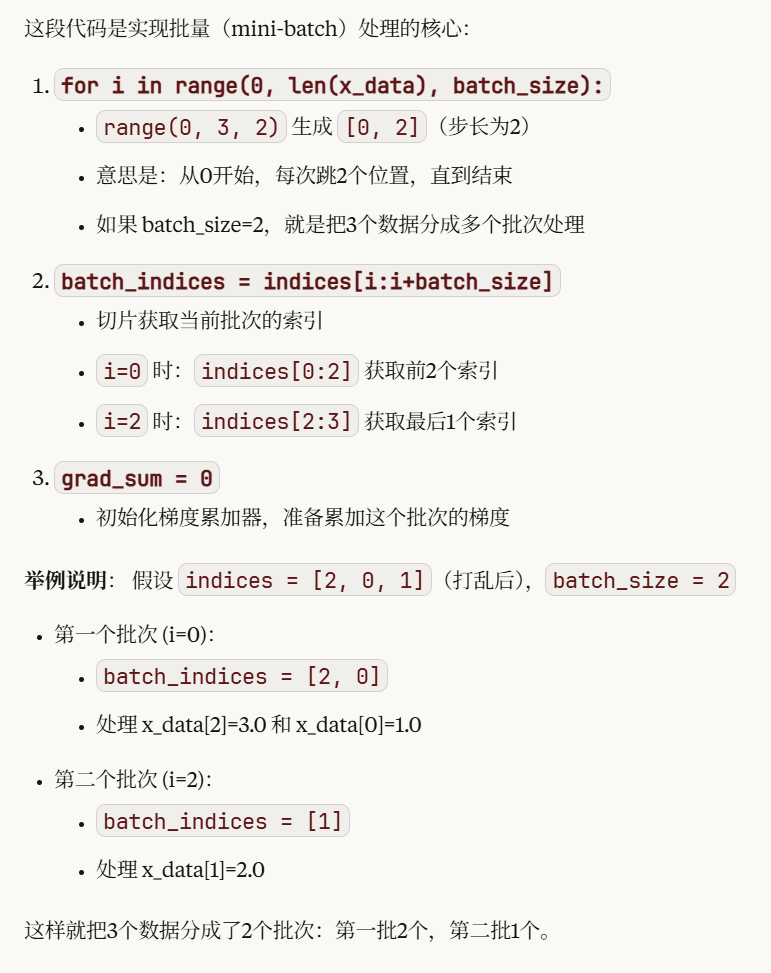